In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('winequalityN.csv')#,header=None,usecols=[0,1,2])
#df.columns=['Class label', 'Alcohol', 'Malic acid']

In [56]:
#df=df.iloc[1:,:]
df=df.iloc[:,0:3]
df.sample(5)

,type,fixed acidity,volatile acidity
1491,white,7.5,0.200
6451,red,7.3,0.735
2221,white,8.5,0.280
1262,white,7.3,0.180
72,white,6.0,0.270


In [57]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [58]:
df['type']= encoder.fit_transform(df['type'])

In [59]:
df['fixed acidity']=df['fixed acidity'].apply(float)
df['volatile acidity']=df['volatile acidity'].apply(float)

In [60]:
df.sample(5)

,type,fixed acidity,volatile acidity
5060,0,7.8,0.530
6339,0,7.4,0.785
4777,1,5.9,0.270
3798,1,7.9,0.210
3146,1,6.2,0.230


<Axes: xlabel='fixed acidity', ylabel='Density'>

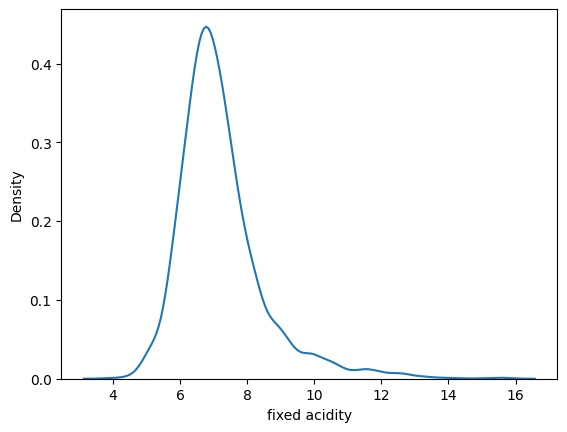

In [61]:
sns.kdeplot(df['fixed acidity'])

<Axes: xlabel='volatile acidity', ylabel='Density'>

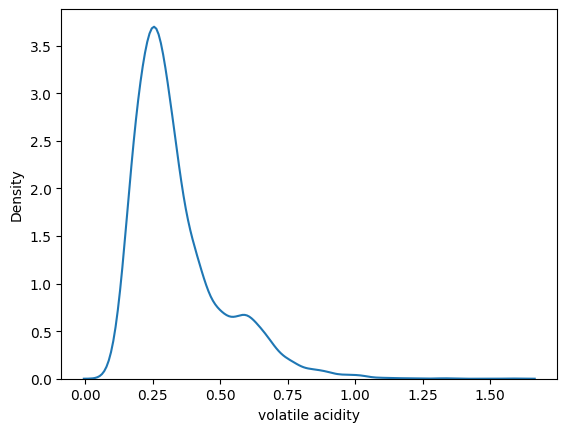

In [62]:
sns.kdeplot(df['volatile acidity'])

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

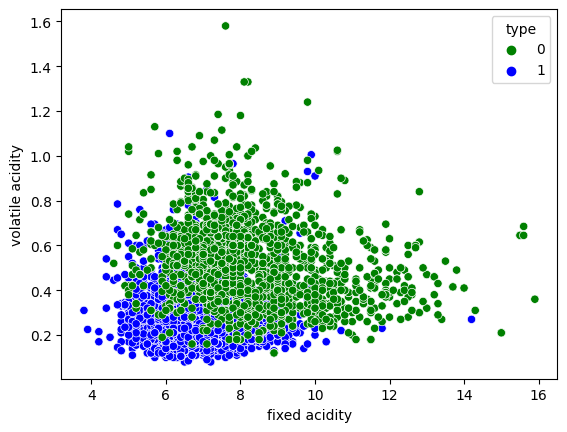

In [63]:
color_dict={0:'green',1:'blue'}
sns.scatterplot(x=df['fixed acidity'],y=df['volatile acidity'],hue=df['type'],palette=color_dict)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('type', axis=1),
                                                    df['type'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((4547, 2), (1950, 2))

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
#converting to df from numpy array
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [68]:
np.round(X_train.describe(), 1)

,fixed acidity,volatile acidity
count,4538.0,4544.0
mean,7.2,0.3
std,1.3,0.2
min,3.8,0.1
25%,6.4,0.2
50%,7.0,0.3
75%,7.7,0.4
max,15.6,1.6


In [69]:
np.round(X_train_scaled.describe(), 1)

,fixed acidity,volatile acidity
count,4538.0,4544.0
mean,0.3,0.2
std,0.1,0.1
min,0.0,0.0
25%,0.2,0.1
50%,0.3,0.1
75%,0.3,0.2
max,1.0,1.0


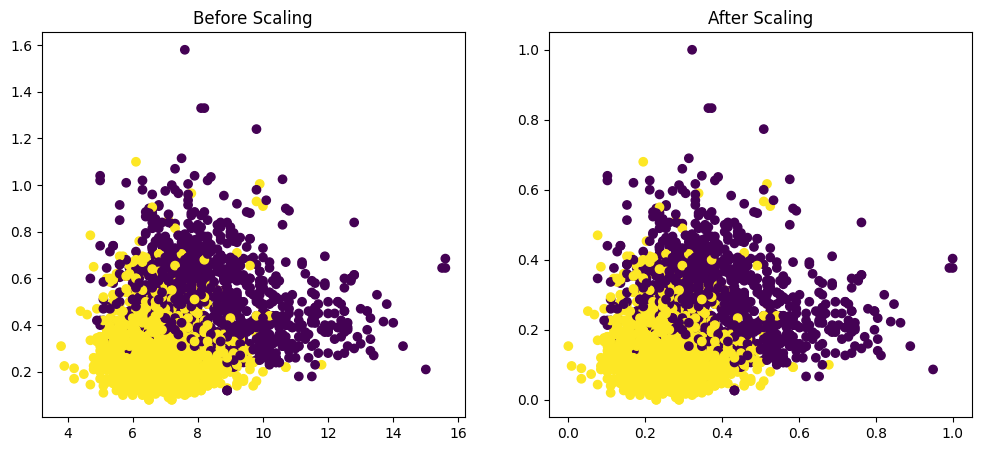

In [71]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['fixed acidity'], X_train['volatile acidity'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['fixed acidity'], X_train_scaled['volatile acidity'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

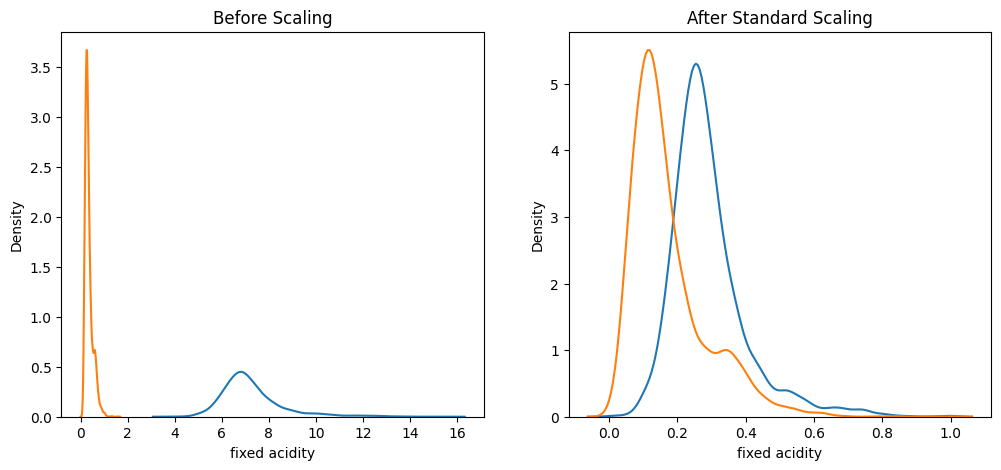

In [72]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['fixed acidity'], ax=ax1)
sns.kdeplot(X_train['volatile acidity'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['fixed acidity'], ax=ax2)
sns.kdeplot(X_train_scaled['volatile acidity'], ax=ax2)
plt.show()

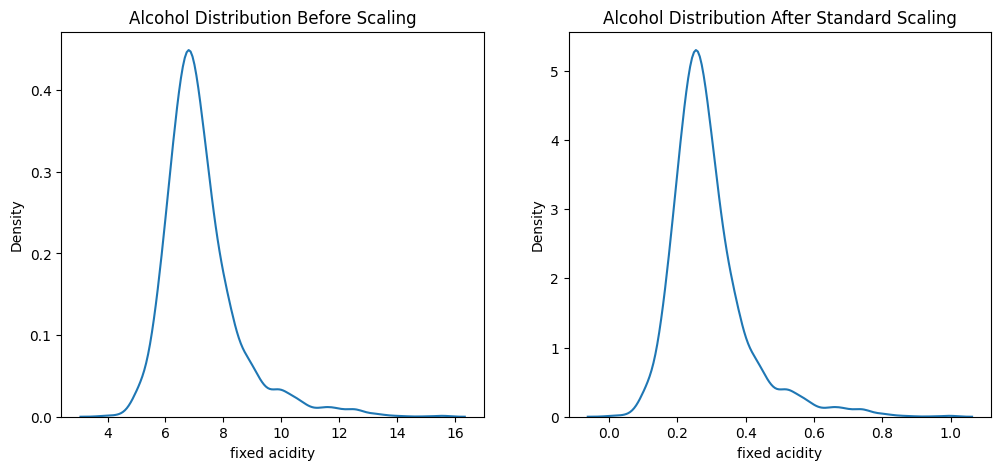

In [73]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['fixed acidity'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['fixed acidity'], ax=ax2)
plt.show()

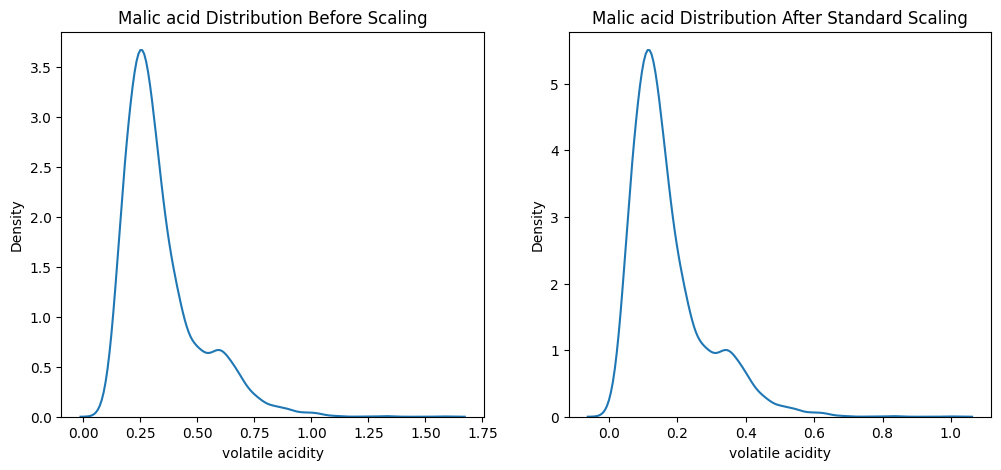

In [74]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['volatile acidity'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['volatile acidity'], ax=ax2)
plt.show()